In [1]:
import os
for dirname, _,filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

/kaggle/input/nlp-getting-started/sample_submission.csv
/kaggle/input/nlp-getting-started/train.csv
/kaggle/input/nlp-getting-started/test.csv


In [47]:
import warnings
warnings.filterwarnings('ignore')

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import string
import regex
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

Guys,Welcome to my notebook. Here I will try to explain each and every functions,module, statements used in this notebook. Even if u have not a simple peice of information about NLP or Text Analysis, you will understand this notebook so easily... keep reading...

In [49]:
# loading train and test dataset
train=pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
test=pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')

In [50]:
train.head(3)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


In [51]:
test.head(3)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."


In [52]:
train.shape,test.shape

((7613, 5), (3263, 4))

In [53]:
# Getting duplicates rows 
duplicate_id=train[train.duplicated()]
print(duplicate_id)

Empty DataFrame
Columns: [id, keyword, location, text, target]
Index: []


In [54]:
duplicate_id=test[test.duplicated()]
print(duplicate_id)

Empty DataFrame
Columns: [id, keyword, location, text]
Index: []


> AS WE CAN SEE THERE IS NO DUPLICATED ID IN ID COLUMN

In [55]:
# Getting null values in train dataset
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [56]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [57]:
# printing first 10 uniques values of keyword column
train['keyword'].unique()[0:10]

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon'], dtype=object)

In [58]:
# dropping two columns since they are not of much use
train.drop(['location','keyword'],axis=1,inplace=True)

In [59]:
test.drop(['location','keyword'],axis=1,inplace=True)

In [60]:
print("Missing in Train:\n",train.isnull().sum())
print("\nMissing in Test:\n",test.isnull().sum())

Missing in Train:
 id        0
text      0
target    0
dtype: int64

Missing in Test:
 id      0
text    0
dtype: int64


**There is no null value left in train and test data**

In [61]:
# making separate dataset of where tweets are disastrous (train.target==1), and non disastrous
train_1=train[train['target']==1]
train_0=train[train['target']==0]

In [62]:
# percentage of disastrous tweets
per=(len(train_1)/len(train))*100
per

42.96597924602653

**Around 43 percent of the total tweets are disastrous**

In [63]:
# percentage of non-disastrous (or fake disastrous) tweets
per=(len(train_0)/len(train))*100
per

57.03402075397347

**Around 57 percent of the total tweets are non-disastrous**

<AxesSubplot:xlabel='target', ylabel='count'>

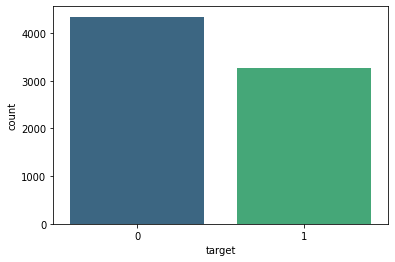

In [64]:
# visualising fake and real disastrous tweets
sns.countplot(train['target'],palette='viridis')

**Number of fake disastrous tweets are a little more than that of real disastrous tweets**

The "string" module of python contains "constants" and "classes" for working with text.
The "constants" is used to specify categories of characters such as ascii_letters and digits.

Below, we have used such a constants named "punctuation" from "string" module of python, it returns all sets of punctuation.
It Doesn’t take any parameter, since it’s not a function.
See Below code and output

In [65]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [66]:
stopwords_=set(stopwords.words('english'))

Natural Language Toolkit (NLTK) is a widely used, open-source Python library for NLP (NLTK Project, 2018). Several algorithms are available for working with test data e.g. text tokenization, stemming, stop word removal, classification, clustering, PoS tagging, parsing, and semantic reasoning. It also provides wrappers for other NLP libraries.

A corpus can be defined as a collection of text documents. It can be thought as just a bunch of text files in a directory, often alongside many other directories of text files.

Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For example, the words like the, he, have etc.

In [67]:
def message_cleaning(text):
#taking only characters  without any punctuation
    punc_removed = [char for char in text if char not in string.punctuation]
    punc_removed_joined = ''.join(punc_removed)
    punc_removed_joined_clean = [word for word in punc_removed_joined.split(' ') if word not in stopwords.words('english')]
    return punc_removed_joined_clean

> In order to use textual data for predictive modeling, the text must be parsed(resolved into compenent parts) to remove certain words – this process is called tokenization.** 

> These words need to then be encoded as integers, or floating-point values, for use as inputs in machine learning algorithms. This process is called feature extraction (or vectorization)

In [68]:
cv = CountVectorizer(analyzer=message_cleaning)
disaster_tweet_vector = cv.fit_transform(train['text'])
# vectorizer.get_feature_names()
disaster_tweet_vector.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

> CountVectorizer is used to convert a collection of text documents to a vector of term/token counts.
The sklearn.feature_extraction module can be used to extract features in a format supported by machine learning algorithms from datasets consisting of formats such as text and image.

> Feature extraction is very different from Feature selection: "Feature extraction" helps in transforming arbitrary data, such as text or images, into numerical features usable for machine learning. While "feature_selection" is a machine learning technique applied on these features.

In [69]:
disaster_tweet_vector.shape

(7613, 26918)

****There are 7613 disasterous tweets and 26918 unique words.****

In [70]:
# selecting dependent and independent variable
x = disaster_tweet_vector.toarray()
y = train['target']

In [71]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

In [72]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
print('Train Score: ',lr.score(xtrain,ytrain))
print('Test Score: ',lr.score(xtest,ytest))

Train Score:  0.9814328253634612
Test Score:  0.7872899159663865


In [73]:
ypred=lr.predict(xtest)
accuracy_score(ytest,ypred)

0.7872899159663865

In [74]:
# Decision Tree
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred2=dt.predict(xtest)
print('Train Score: ',dt.score(xtrain,ytrain))
print('Test Score: ',dt.score(xtest,ytest))
print('Accuracy Score: ',accuracy_score(ytest,ypred2))

Train Score:  0.9971974076020319
Test Score:  0.7510504201680672
Accuracy Score:  0.7510504201680672


In [75]:
# Random forest model
rf=RandomForestClassifier(n_estimators=300)
rf.fit(xtrain,ytrain)
ypred3=rf.predict(xtest)
print('Train Score: ',rf.score(xtrain,ytrain))
print('Test Score: ',rf.score(xtest,ytest))
print('Accuracy Score: ',accuracy_score(ytest,ypred3))

Train Score:  0.9971974076020319
Test Score:  0.7783613445378151
Accuracy Score:  0.7783613445378151


In [76]:
# Naive Bayes
nb=MultinomialNBltinomialNB()
nb.fit(xtrain,ytrain)
ypred4=nb.predict(xtest)
print('Train Score: ',nb.score(xtrain,ytrain))
print('Test Score: ',nb.score(xtest,ytest))
print('Accuracy Score: ',accuracy_score(ytest,ypred4))

Train Score:  0.9971974076020319
Test Score:  0.7809873949579832
Accuracy Score:  0.7809873949579832


### Working with Test Data

In [77]:
test_vectorized=cv.transform(test['text'])
final_pred=lr.predict(test_vectorized)
# we are using logistic regression for the final prediction since it has the highest accuracy 

In [79]:
my_pred={'id':test['id'],'target':final_pred}
my_submission=pd.DataFrame(my_pred)
my_submission.to_csv('disaustrous_tweet_pred.csv')